<a href="https://colab.research.google.com/github/ShruthiAnand30/Class119Challenge/blob/main/Class119Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
data = files.upload()


Saving Class119Challenge.csv to Class119Challenge.csv


In [3]:
import pandas as pd
column_names = ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Survived"]
df = pd.read_csv("Class119Challenge.csv", names = column_names).iloc[1:]
print(df.head(5))

  PassengerId Pclass Sex   Age SibSp Parch Survived
1           1      3   1  34.5     1     0        0
2           2      1   0    47     1     0        1
3           3      3   0    62     0     0        1
4           4      1   0    27     1     0        1
5           5      3   1    22     0     0        0


In [4]:
features = ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch"]
x = df[features]

y = df.Survived

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("Accurancy: ", metrics.accuracy_score(y_test, y_pred))

Accurancy:  0.7238805970149254


In [8]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image

data = StringIO()
export_graphviz(clf, out_file = data, filled = True, rounded = True, special_characters = True, feature_names = features, class_names = ['0', '1'])

print(data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Sex &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<PassengerId &le; 176.0<br/>gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>class = 1>, fillcolor="#81c1ee"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 4 ;
5 [label=<gini = 0.463<br/>samples = 11<br/>value = [4, 7]<br/>class = 1>, fillcolor="#aad5f4"] ;
3 -> 5 ;
6 [label=<PassengerId &le; 854.5<br/>gini = 0.038<br/>samples = 102<br/>value = [2, 100]<br/>class = 

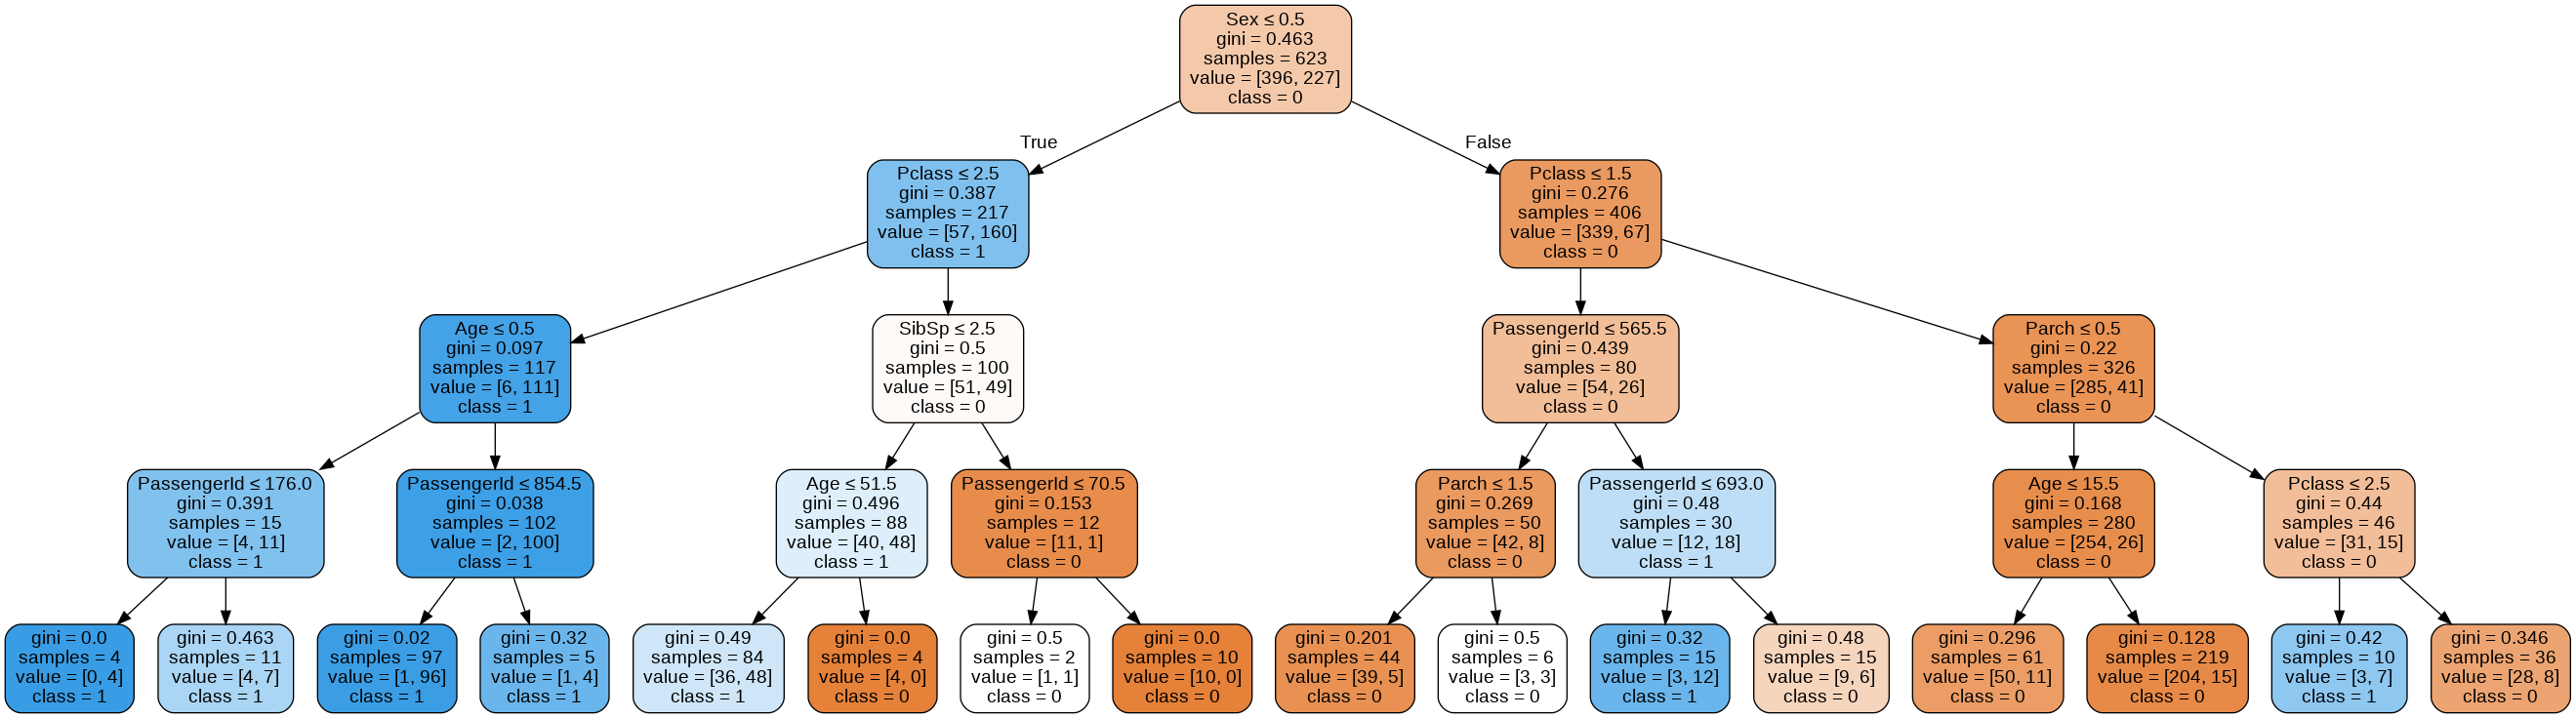

In [9]:
import pydotplus

graph = pydotplus.graph_from_dot_data(data.getvalue())
graph.write_png("Titanic.png")

Image(graph.create_png())